#### DOMAIN:
Sports management

#### CONTEXT:
Company X is a sports management company for international cricket.

#### DATA DESCRIPTION:
The data is collected belongs to batsman from IPL series conducted so far. Attribute Information:

1. Runs: Runs score by the batsman
2. Ave: Average runs scored by the batsman per match
3. SR: strike rate of the batsman
4. Fours: number of boundary/four scored
5. Six: number of boundary/six scored
6. HF: number of half centuries scored so far

#### PROJECT OBJECTIVE:
Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.

In [1]:
#loading the required packages
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
os.chdir('C:\\Users\\RajSri\\Documents\\PGP AIML GL Notebooks\\19. Unsupervised Learning - Project')

In [6]:
bb=pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')
bb.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
bb=bb.dropna(axis=0)
bb.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [9]:
#checking for the dimension of the data
rows, column = bb.shape
print('The dataset contains', rows, 'rows and', column, 'columns.')

The dataset contains 90 rows and 7 columns.


### EDA

In [10]:
print('The data type of each attribute: \n')
bb.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
Name     90 non-null object
Runs     90 non-null float64
Ave      90 non-null float64
SR       90 non-null float64
Fours    90 non-null float64
Sixes    90 non-null float64
HF       90 non-null float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [13]:
#5-point summary
bb.describe().T

,count,mean,std,min,25%,50%,75%,max
Runs,90.0,219.933333,156.253669,2.00,98.000,196.500,330.7500,733.00
Ave,90.0,24.729889,13.619215,0.50,14.665,24.440,32.1950,81.33
SR,90.0,119.164111,23.656547,18.18,108.745,120.135,131.9975,164.10
Fours,90.0,19.788889,16.399845,0.00,6.250,16.000,28.0000,73.00
Sixes,90.0,7.577778,8.001373,0.00,3.000,6.000,10.0000,59.00
HF,90.0,1.188889,1.688656,0.00,0.000,0.500,2.0000,9.00


In [12]:
print('Duplicated rows: ', bb[bb.duplicated()].shape[0])

Duplicated rows:  0


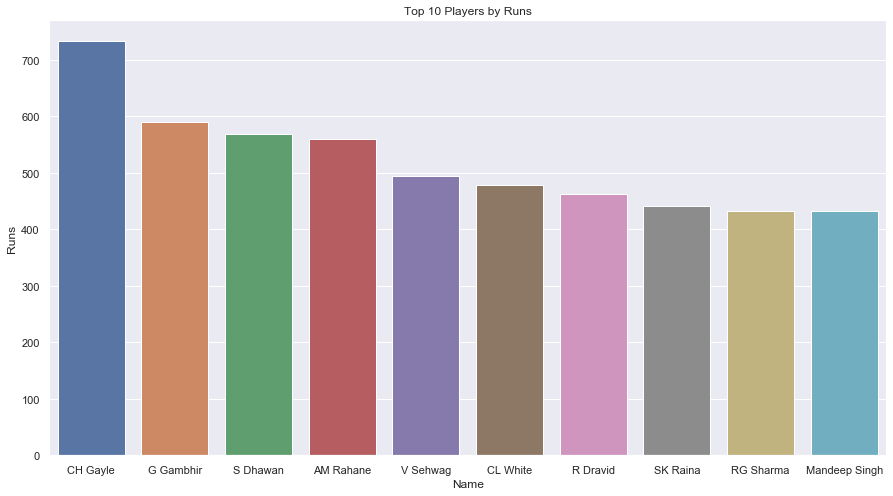

In [14]:
plt.figure(figsize=(15,8))
b1=bb.groupby('Name')['Runs'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Runs']
sns.barplot(data= b1 , x= 'Name' , y ='Runs');
plt.title("Top 10 Players by Runs");

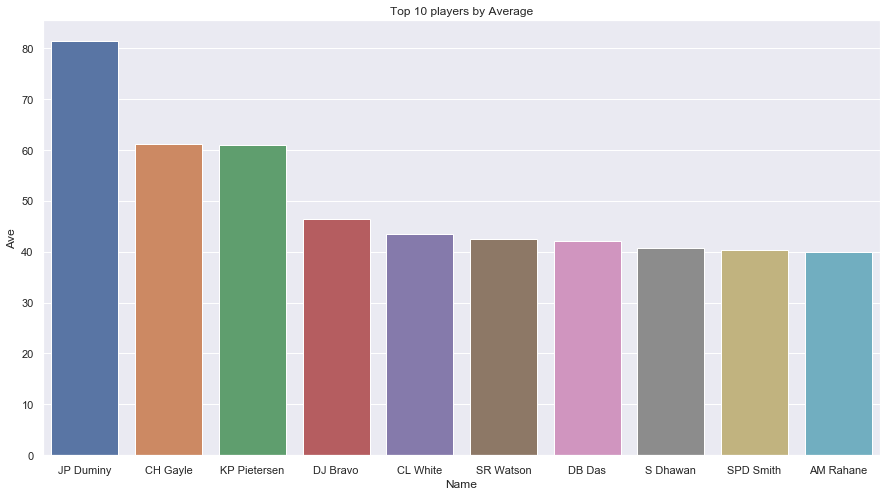

In [15]:
plt.figure(figsize=(15,8))
b1=bb.groupby('Name')['Ave'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Ave']
sns.barplot(data= b1 , x= 'Name' , y ='Ave')
plt.title("Top 10 players by Average");

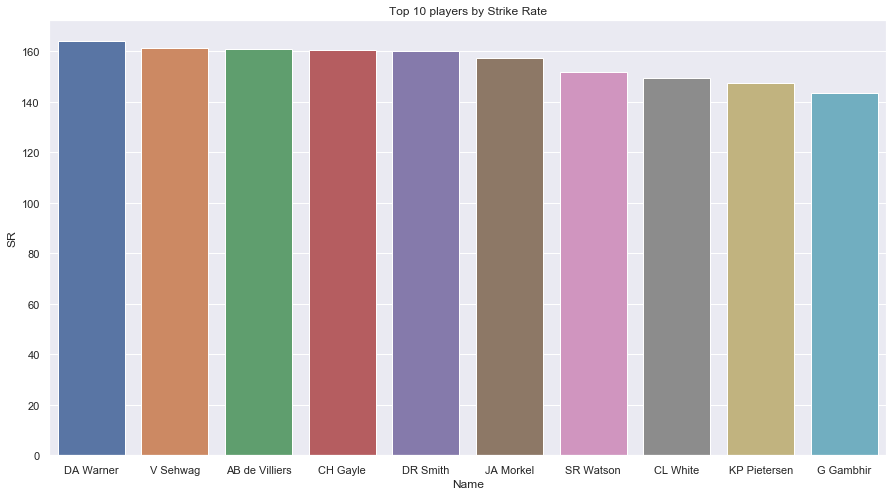

In [16]:
plt.figure(figsize=(15,8))
b1=bb.groupby('Name')['SR'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'SR']
sns.barplot(data= b1 , x= 'Name' , y ='SR')
plt.title("Top 10 players by Strike Rate");

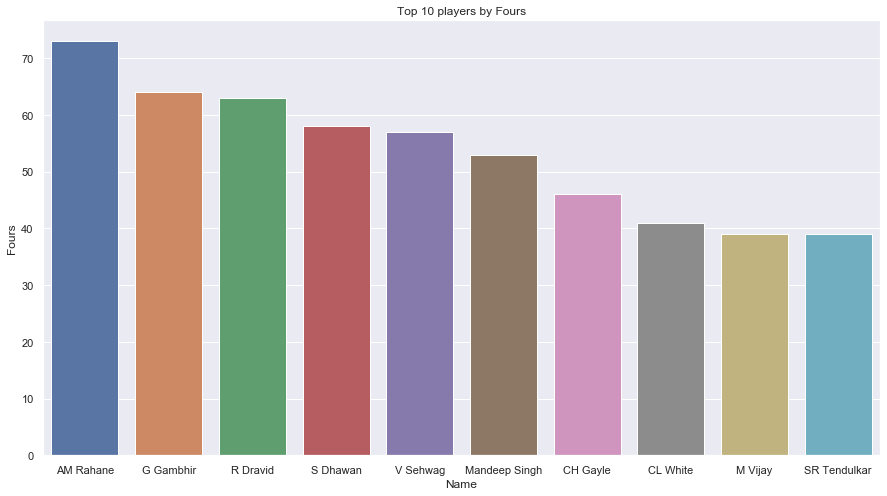

In [17]:
plt.figure(figsize=(15,8))
b1=bb.groupby('Name')['Fours'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Fours']
sns.barplot(data= b1 , x= 'Name' , y ='Fours')
plt.title("Top 10 players by Fours");

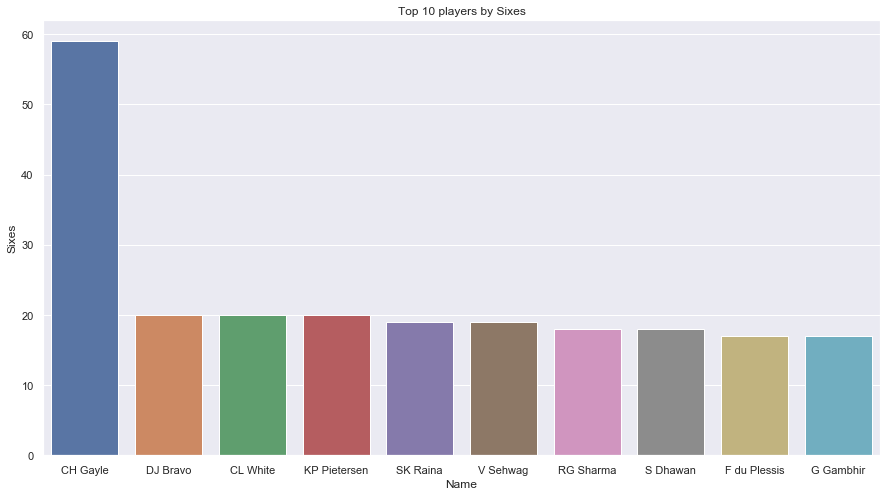

In [18]:
plt.figure(figsize=(15,8))
b1=bb.groupby('Name')['Sixes'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Sixes']
sns.barplot(data= b1 , x= 'Name' , y ='Sixes')
plt.title("Top 10 players by Sixes");

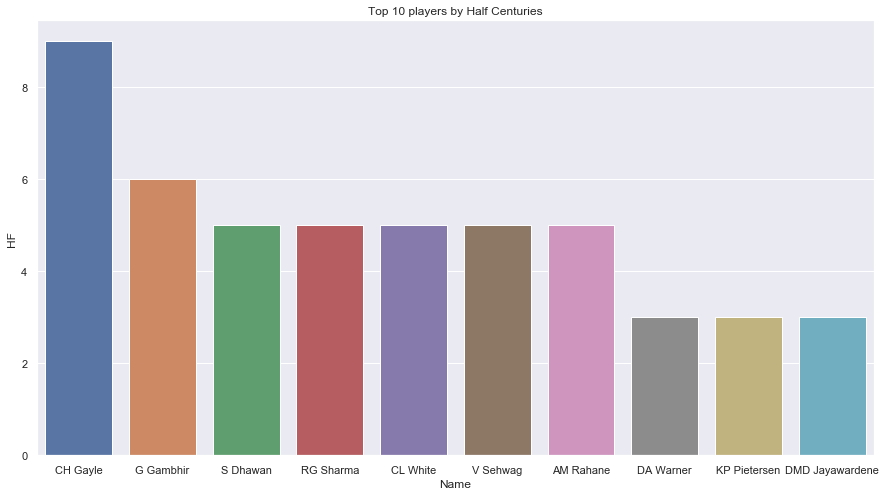

In [19]:
plt.figure(figsize=(15,8))
b1=bb.groupby('Name')['HF'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'HF']
sns.barplot(data= b1 , x= 'Name' , y ='HF')
plt.title("Top 10 players by Half Centuries");

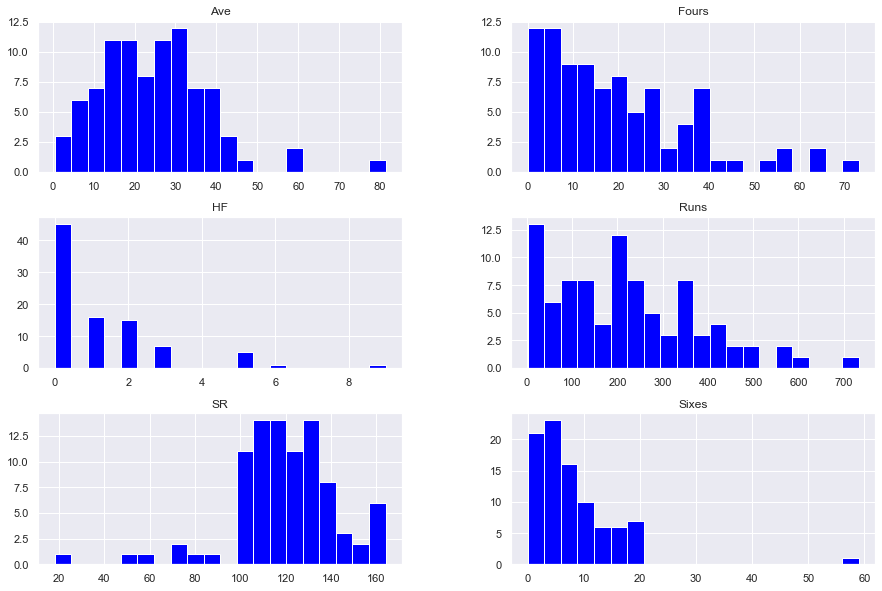

In [20]:
bb.hist(bins = 20, figsize = (15, 10), color = 'blue')
plt.show()

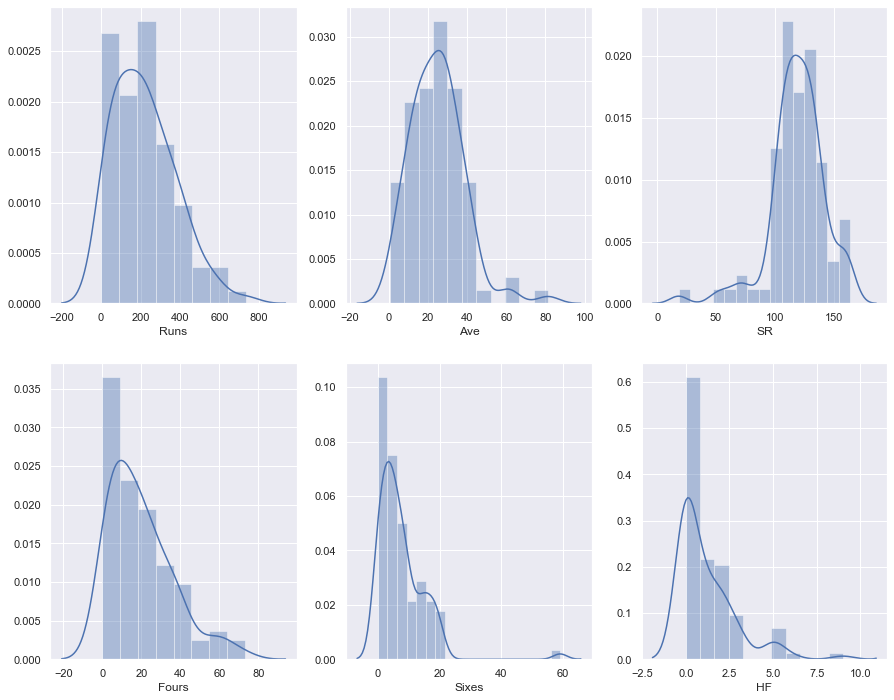

In [21]:
plt.figure(figsize=(15, 12))
col = 1
for i in bb.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.distplot(bb[i], color = 'b')
    col += 1 

##### Insight: Strike rate, fours, sixes and half centuries have a skewed distribution

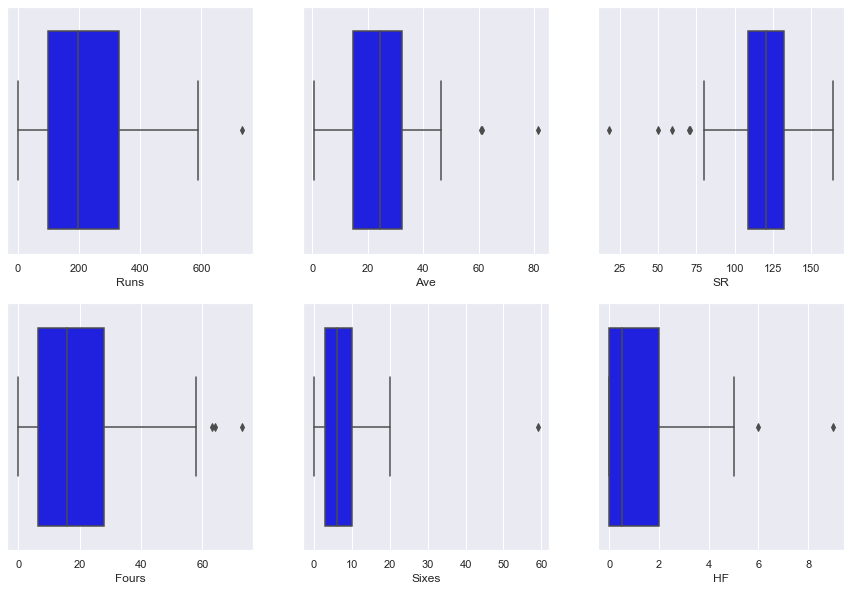

In [22]:
plt.figure(figsize=(15, 10))
col = 1
for i in bb.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.boxplot(bb[i],color='blue')
    col += 1

##### There appears to be outliers, will not be treating them as its highly likely that these are genuine observation

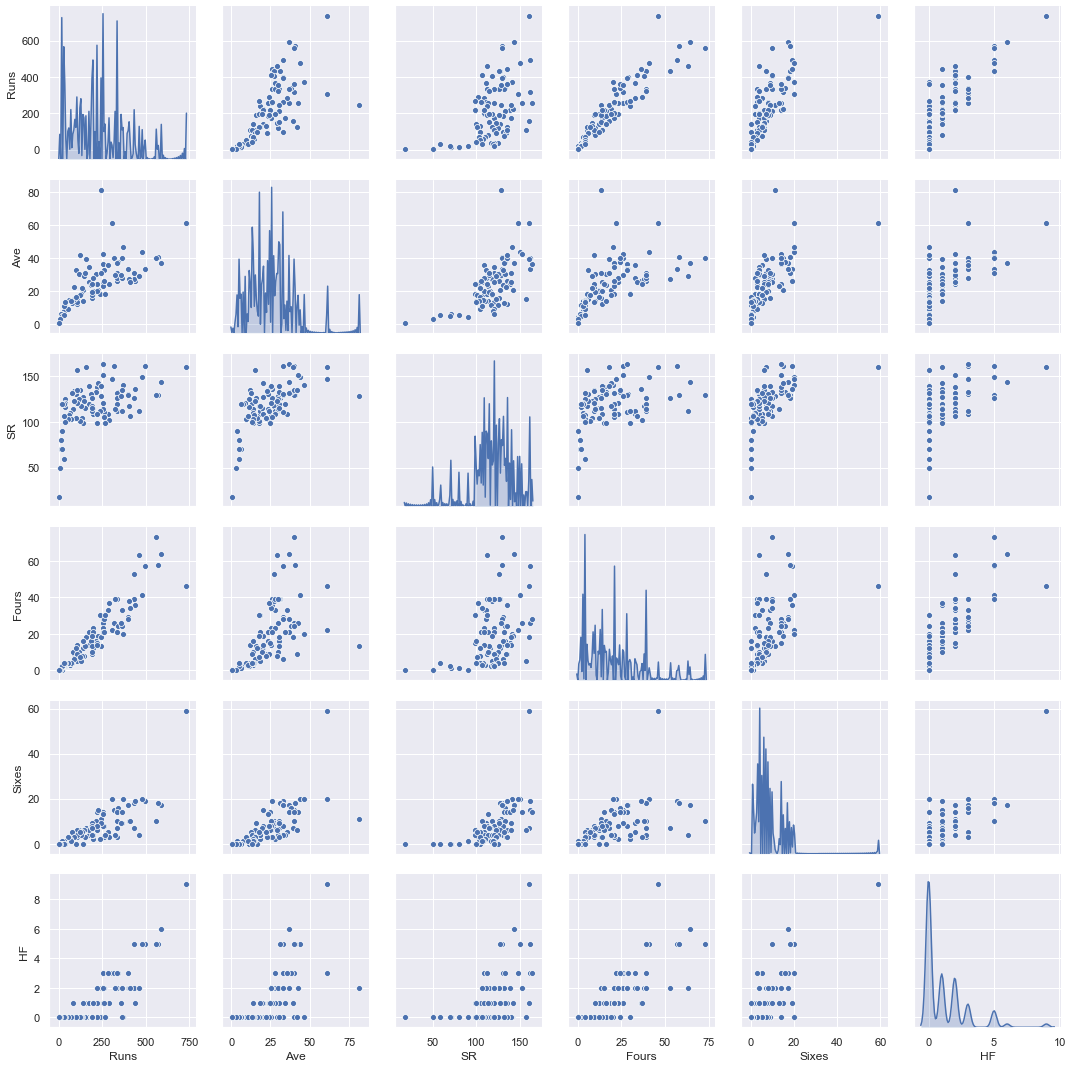

In [39]:
sns.pairplot(bb,diag_kind='kde',diag_kws={'bw': 0.2})

- **We can see linear relationship between Runs,Fours and average.**


- **We can see different distributions in data. Players with no half centuries has scored large runs as well. These players may be finishers.**


- **Players with maximum half centuries have scored lot of runs. This corresponds to openers. Some of the middle order batsmens also scored few half centuries.**


- **We have players who have very less strike rate and runs. This indicates we have data for bowlers as well.**


- **Players with average between 20 to 30 has many 6's,4's and strike rate also high for them**


- **We have players whose strike rate average is 120 . Players whose strike rate is more have more number of 6's and 4's.**


- **We have players who scored many fours but not achieved half century. They might have batted at end of the innings.**

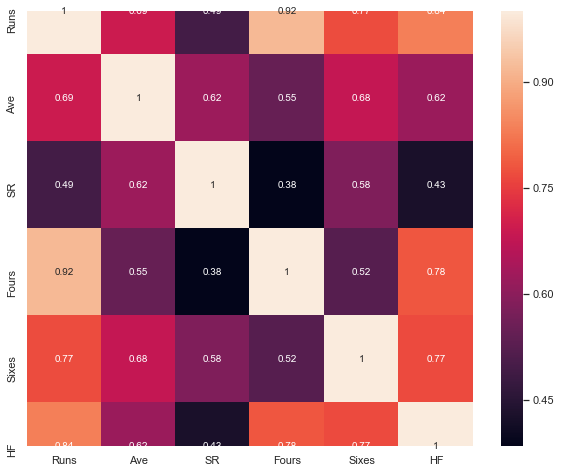

In [23]:
#checking for correlation
plt.figure(figsize=(10,8))
corr=bb.drop(columns='Name').corr()
sns.heatmap(corr,annot=True);

##### All the variable except fours with strike rate, strike rate with half centuries,strike rate with runs, have high correlation

In [24]:
#scaling the numeric variables
cc = bb.iloc[:,1:7] 
cc1 = cc.apply(zscore)
cc1.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


In [25]:
#checking for the within sum of squares
wss =[] 
for i in range(1,6):
    KM = KMeans(n_clusters=i)
    KM.fit(cc1)
    wss.append(KM.inertia_)
wss

[540.0,
 296.26135354732025,
 223.36518460916955,
 182.01227179307668,
 148.61257456074293]

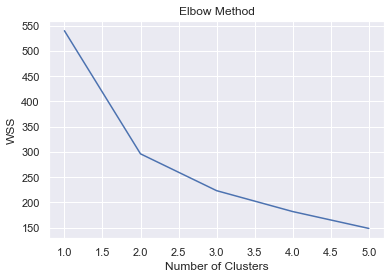

In [26]:
#plotting to check for optimal clustres 
plt.plot(range(1,6), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [28]:
#using 2 centroids
k_means = KMeans(n_clusters = 2)
k_means.fit(cc1)
labels = k_means.labels_

In [29]:
# Calculating silhouette_score
silhouette_score(cc1,labels)

0.41111085574076756

In [30]:
#plotting silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc1)
    score = silhouette_score(cc1,kmeans.labels_)
    silhouette_coefficients.append(score)

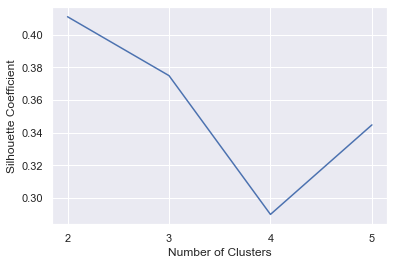

In [31]:
plt.plot(range(2,6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [32]:
#attaching the labels to the original data
bb['cluster']=labels
bb.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,1
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,1
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,1
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,1
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,1


In [33]:
#veiwing the distribution of the clusters
bb.cluster.value_counts().sort_index()

0    55
1    35
Name: cluster, dtype: int64

In [34]:
#aggregating the clusters with the numeric variables with their mean
aggdata=bb.iloc[:,0:9].groupby('cluster').mean()
aggdata['Freq']=bb.cluster.value_counts().sort_index()
aggdata

,Runs,Ave,SR,Fours,Sixes,HF,Freq
cluster,,,,,,,
0,122.745455,17.582000,110.481455,10.309091,3.636364,0.218182,55
1,372.657143,35.962286,132.808286,34.685714,13.771429,2.714286,35


In [35]:
#based on the above table renaming/ranking the playes in Grade A and Grade B
bb['cluster'] = bb['cluster'].replace({1: 'Grade A', 0: 'Grade B'})

In [36]:
#list of Grade A players
Grade_A = bb[bb['cluster'] == 'Grade A']
Grade_A.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade A
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade A
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Grade A
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Grade A
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade A
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,Grade A
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,Grade A
15,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0,Grade A
17,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0,Grade A
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0,Grade A


In [37]:
Grade_B = bb[bb['cluster'] == 'Grade B']
Grade_B.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
69,MS Bisla,213.0,30.42,133.12,16.0,10.0,1.0,Grade B
73,BJ Hodge,245.0,30.62,140.00,18.0,9.0,0.0,Grade B
75,NV Ojha,255.0,23.18,113.83,21.0,13.0,1.0,Grade B
77,DB Das,126.0,42.00,135.48,9.0,6.0,0.0,Grade B
79,AC Gilchrist,172.0,34.40,120.27,21.0,4.0,1.0,Grade B


### Summary: Gayle is the most valuable player with highest runs and average.
